## 作業目標
* 畫出 16 個 bin 的顏色直方圖,並嘗試回答每個 channel 在 [16, 32] 這個 bin 中有多少個 pixel？
* 確保同學知道如何改變參數以及理解 cv2.calcHist 這個函數輸出的資料含義

In [1]:
import os
import keras
os.environ["CUDA_VISIBLE_DEVICES"] = "" # 使用 CPU

import cv2 # 載入 cv2 套件
import matplotlib.pyplot as plt

train, test = keras.datasets.cifar10.load_data()

Using TensorFlow backend.


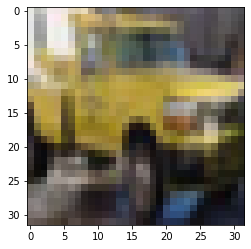

In [2]:
import numpy as np

n = np.random.choice(50000)

image = train[0][n] # 讀取圖片

plt.imshow(image)
plt.show()

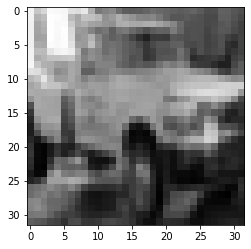

In [3]:
# 把彩色的圖片轉為灰度圖
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.imshow(gray, cmap='gray')
plt.show()

通過調用 __cv2.calcHist(images, channels, mask, histSize, ranges)__ 函數來得到統計後的直方圖值

* images (list of array)：要分析的圖片
* channels：產生的直方圖類型。例：[0]→灰度圖，[0, 1, 2]→RGB三色。
* mask：optional，若有提供則僅計算 mask 部份的直方圖。
* histSize：要切分的像素強度值範圍，預設為256。每個channel皆可指定一個範圍。例如，[32,32,32] 表示RGB三個channels皆切分為32區段。
* ranges：像素的範圍，預設為[0,256]，表示<256。

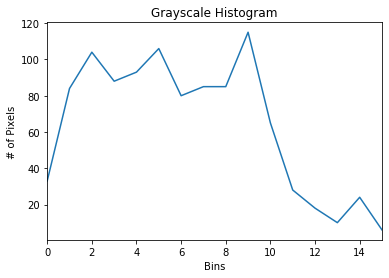

In [5]:
# 調用 cv2.calcHist 函數，回傳值就是 histogram
hist = cv2.calcHist([gray], [0], None, [16], [0, 256])
plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.plot(hist)
plt.xlim([0, 15])
plt.show()

In [6]:
print("hist shape:", hist.shape, "\n灰階直方圖中在 [16, 32] 這個 bin 中有:"+str(hist[16//16:32//16])+"個pixel")

hist shape: (16, 1) 
灰階直方圖中在 [16, 32] 這個 bin 中有:[[84.]]個pixel


hist shape: (16, 1) 
r channel 直方圖中在 [16, 32] 這個 bin 中有:[[74.]]個pixel
hist shape: (16, 1) 
g channel 直方圖中在 [16, 32] 這個 bin 中有:[[83.]]個pixel
hist shape: (16, 1) 
b channel 直方圖中在 [16, 32] 這個 bin 中有:[[137.]]個pixel


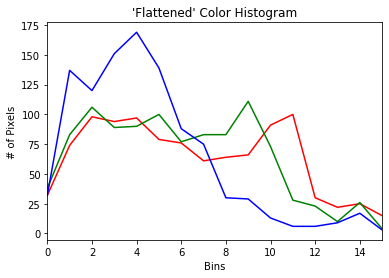

In [7]:
chans = cv2.split(image) # 把圖像的 3 個 channel 切分出來
colors = ("r", "g", "b")
plt.figure()
plt.title("'Flattened' Color Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")

# 對於所有 channel
for (chan, color) in zip(chans, colors):
    # 計算該 channel 的直方圖
    hist = cv2.calcHist([chan], [0], None, [16], [0, 256])
    print("hist shape:", hist.shape, "\n"+color+" channel 直方圖中在 [16, 32] 這個 bin 中有:"+str(hist[16//16:32//16])+"個pixel")
    # 畫出該 channel 的直方圖
    plt.plot(hist, color = color)
    plt.xlim([0, 15])
plt.show()